# CS 458

## Antonio Lang

# P4-1. Hierarchical Clustering Dendrogram

In [2]:
import numpy as np 
np.random.seed(0) 
X1 = np.random.randn(50,2)+[2,2] 
X2 = np.random.randn(50,2)+[6,10] 
X3 = np.random.randn(50,2)+[10,2] 
X = np.concatenate((X1,X2,X3))

In [3]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

models = []
linkages = ['ward', 'complete', 'average', 'single']
for linkage in linkages:
    model = (AgglomerativeClustering(distance_threshold=0, n_clusters=None,
                                            linkage=linkage))
    model = model.fit(X)
    models.append(model)

In [4]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                        counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

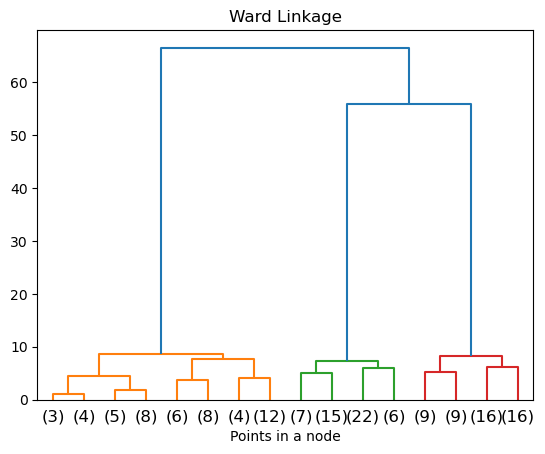

In [5]:
from matplotlib import pyplot as plt
plt.title('Ward Linkage')
plot_dendrogram(models[0], truncate_mode="level", p=3)
plt.xlabel("Points in a node")
plt.show()

# figure, axis = plt.subplots(2,2)

# axis[0,0] = plot_dendrogram(models[0], truncate_mode="level", p=3)
# axis[0,1] = plot_dendrogram(models[1], truncate_mode="level", p=3)

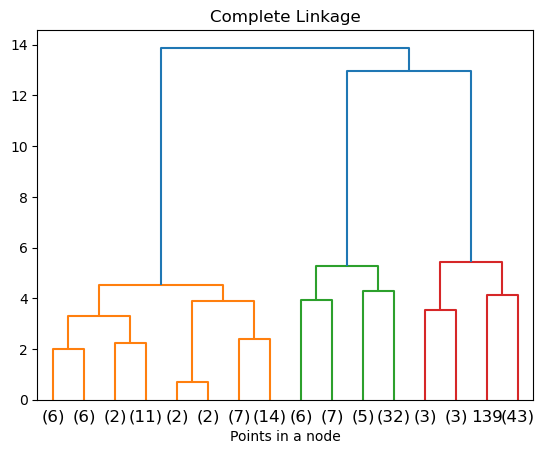

In [6]:
from matplotlib import pyplot as plt
plt.title('Complete Linkage')
plot_dendrogram(models[1], truncate_mode="level", p=3)
plt.xlabel("Points in a node")
plt.show()

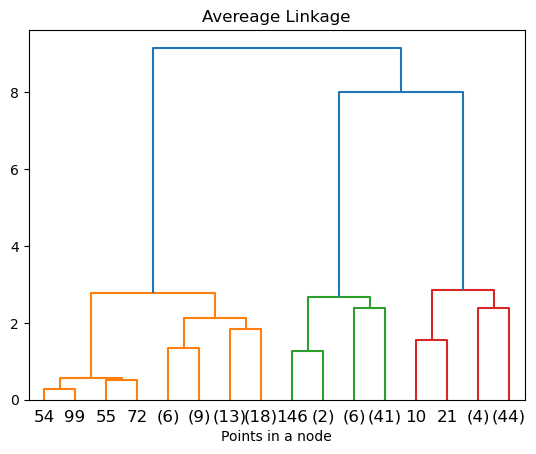

In [7]:
from matplotlib import pyplot as plt
plt.title('Avereage Linkage')
plot_dendrogram(models[2], truncate_mode="level", p=3)
plt.xlabel("Points in a node")
plt.show()

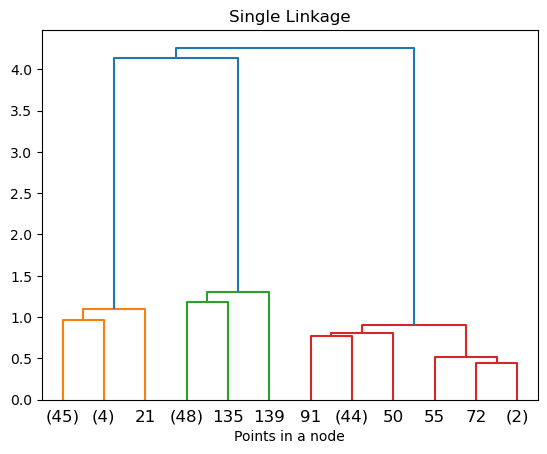

In [8]:
from matplotlib import pyplot as plt
plt.title('Single Linkage')
plot_dendrogram(models[3], truncate_mode="level", p=3)
plt.xlabel("Points in a node")
plt.show()

# P4-2. Clustering Structured Dataset

In [86]:
from sklearn.datasets import make_swiss_roll 
# Generate data (swiss roll dataset) 
n_samples = 1500 
noise = 0.05 
X, _ = make_swiss_roll(n_samples, noise=noise) 
# Make it thinner 
X[:, 1] *= .5 

TypeError: Axes3D.plot() missing 1 required positional argument: 'ys'

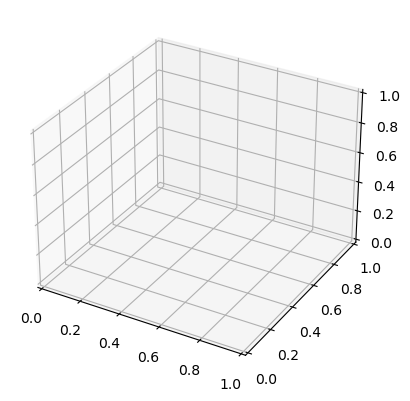

In [91]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
connectivty = kneighbors_graph(X, n_neighbors=10, include_self=False)
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.plot(connectivty)

In [11]:
from sklearn.cluster import DBSCAN

# P4-3. Clustering Handwritten Digits Data

In [21]:
from sklearn import datasets
digits, labels = datasets.load_digits(return_X_y=True)

In [84]:
from sklearn.cluster import KMeans, DBSCAN

kmeans = KMeans(init='random',n_clusters=10, n_init=10, random_state=0).fit(digits)
k_labels = kmeans.predict(digits)

dbscan = DBSCAN(eps=450, min_samples=30, algorithm='ball_tree').fit(digits)
db_labels = dbscan.labels_

In [85]:
k_correct = sum(k_labels == labels)
db_correct = sum(db_labels == labels)

num_labels = len(labels)

print(f"KMeans accuracy: {round(k_correct*100/num_labels,2)}%")
print(f"DBSCAN accuracy: {round(db_correct*100/num_labels,2)}%")

KMeans accuracy: 25.99%
DBSCAN accuracy: 9.91%


# Resources
- https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html